# Introduction to biodiversity

In this project we will be analyzing data from the National Parks Service, particularly about observations of species in different national parks.

In this project we will be scoping, exploring, analysing and seeking to communicate our findings in a meaningful way

Here are some of the goals that this project is seeking to answer:
* what is the distribution of conservation status for species?: Finished
* are certain types of species more likely to be endangered?: 
* are the differences between species and their conservation status significant?
* Which animal is most prevalent and what is their distribution amongst parks?



## Importing Modules

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data
we will be loading the data using the `read_csv` function from the `pandas` library, and then we will be using the `head` function to view the first 5 rows of the data.

#### species
The species data contains 4 unique columns:
1. `category`: the category of the species
2. `scientific_name`: the scientific name of the species
3. `common_names`: the common names of the species
4. `conservation_status`: the conservation status of the species, if its NaN then the species is not endangered

In [2]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The observations data contains 3 unique columns:
1. `scientific_name`: the scientific name of the species
2. `park_name`: the name of the national park
3. `observations`: the number of observations of the species in the park

In [3]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data characteristics

next we will be looking at the `shape` of the data, AKA the number of rows and columns in the data. That will help us understand the size of the data we are working with, before we start to explore and analyse it.

In [4]:
print(f'Shape of species: {species.shape}')
print(f'Shape of observations: {observations.shape}')

Shape of species: (5824, 4)
Shape of observations: (23296, 3)


## Data exploration

In this section we will look into getting to know our data a little better, the better we can use it to uncover insights and answer our questions.

### Observations

lets start by looking at the `scientific_name` column, and see how many unique values it has.

In [5]:
print(f'Number of unique species: {observations.scientific_name.nunique()}')

Number of unique species: 5541


We can see that there are 5541 unique values in the `scientific_name` column, when there is 23296 rows in the `observations` `DataFrame`. This means that there are some species that have been observed more than once in the same park.

next lets look at the `park_name` column, and see how many unique values it has and what they are called

In [6]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Parks: {observations.park_name.unique()}')

Number of parks: 4
Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


And the last thing that we will be looking at in the `observations` `DataFrame` is the `observations` column, and see what the sum of all observations is.

In [7]:
print(f'total sum of all observations: {observations.observations.sum()}')

total sum of all observations: 3314739


### Species

Lets start by looking at the `conservation_status` column, and see how many unique values it has and what they are called

In [8]:
print(f'Number of unique conservation status: {species.conservation_status.nunique()}')
print(f'Conservation statuses: {species.conservation_status.unique()}')

Number of unique conservation status: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


next we will be looking at the `category` column, and see how many unique values it has and what they are called

In [9]:
print(f'Number of unique categories: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of unique categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here we will be looking at the counts of each `category` to drill one level deeper into the data.

In [10]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

We can see that the Vascular Plant is by far the most common category, and the reptile is the least common.

next lets use the `info` function to get a summary of the `species` `DataFrame` and its dtypes and null values.

We can see that the `conservation_status` column has 191 non-null values. Usually we have to be careful with how we treat null values, but in this case we will be treating them as a category, which is `No Intervention`. So lets replace all the null values with `No Intervention`.

In [11]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


## Analysis
In this section we will now begin analyzing the data after the initial exploration.

First we will be looking at the `conservation_status`column, we have already explored it a little bit, and seen that there are 5 unique value:
1. `nan`
2. `Species of Concern`
3. `Endangered`
4. `Thrreatened`
5. `In Recovery`

There are 5 unique values and one of them is `nan`, which stands for not a number, and usually indicates the absence of data, but in this case we will be treating nan like a category, which is `No Intervention` because it means that the species is not of any concern, and there is no intervention needed. So lets replace all the null values with `No Intervention`.

Note: always treat null values with caution, and make sure that you understand what they mean, and how they will affect your analysis.

In [12]:
species.conservation_status.fillna('No Intervention', inplace=True)
print(f'number of nan values in conservation_status: {species.conservation_status.isna().sum()}')

number of nan values in conservation_status: 0


next up we will be looking into the `category` column, and its relationship with the `conservation_status` column, so lets group the `species` `DataFrame` by `category` and `conservation_status` and count the number of unique values in each group.

In [13]:
conservationCategory = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name'].count()\
        .unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


now lets create a barplot to visualize our data to easier uncover insights in our data. We will be using the `seaborn` library to create the barplot. 

Text(0, 0.5, 'Number of Species')

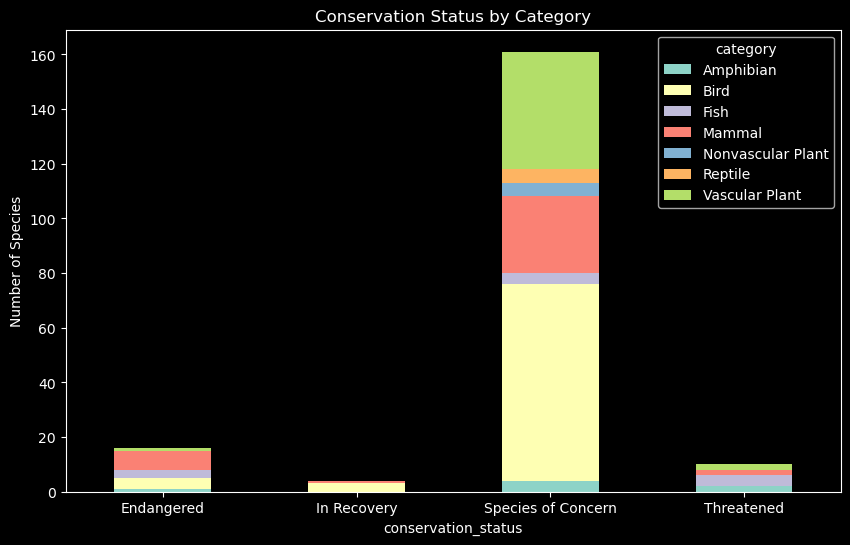

In [19]:
plt.style.use('dark_background')
conservationCategory.plot(kind='bar', stacked=True, figsize=(10, 6))

# rotate x-axis labels
plt.xticks(rotation=0)
plt.title('Conservation Status by Category')
plt.ylabel('Number of Species')

The next question we need to answer is: are certain types of species more likely to be endangered? To answer this question we will be using the `chi2_contingency` function from the `scipy.stats` library. This function will help us determine if there is a significant relationship between the `category` and `conservation_status` columns. But first lets create a new column called `is_protected` which will be a boolean column, and will be `True` if the `conservation_status` is not `No Intervention`, and `False` if it is `No Intervention`.

In [15]:
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

category_counts.columns = ['category','not_protected','protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Next we will looking at how many percentages of each category are protected and how many are not protected. To do this we will be using the `pivot_table` function from the `pandas` library.

In [16]:
category_counts['percent_protected'] = round(category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100)
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,9.0
1,Bird,413,75,15.0
2,Fish,115,11,9.0
3,Mammal,146,30,17.0
4,Nonvascular Plant,328,5,2.0
5,Reptile,73,5,6.0
6,Vascular Plant,4216,46,1.0


### Chi-squared test
In this section we will be testing the statistical significance of the relationship between the `category` and `conservation_status` columns. We will be using the `chi2_contingency` function from the `scipy.stats` library. This function will help us determine if there is a significant relationship between the `category` and `conservation_status` columns. First we will be looking at the `Mammal` and `Bird` categories, and then the `Mammal` and `Reptile` categories. The first contingency table should look like this:

| | Protected | Not Protected |
| --- | --- | --- |
| Mammal | 146 | 30 |
| Bird | 413 | 75 |

In [17]:
stats.chi2_contingency([[30, 146], [75, 413]])

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In the `Chi2ContingencyResult` object we can observe that we have a `p-value` that is way higher than the threshold usually set at `0.05` or `5%`. But we can't only verify the `null-hypothesis` based on the `p-value`, we also need to look at the `chi-squared` value. The `chi-squared` value is `0.16`, which indicates that the `observed` and `expected` values are very similar, and doesn't really deviate from each other. And since the `expected` values is in favor of the `null-hypothesis`, we can conclude that there is no significant relationship between the `Mammal` and `Bird` species and their conservation status.


| | Protected | Not Protected |
| --- | --- | --- |
| Mammal | 146 | 30 |
| Reptile | 5 | 73 |

In [18]:
stats.chi2_contingency([[30, 146], [5, 73]])

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

This time the `pvalue` is lower than the standard threshold of 0.05, so we can conclude that the relationship between the `mammal` and `reptile` categories is that `mammal` species are more likely to be needing protection compared to `reptile` species.